# Trainig Loop

Ceea ce am învățat anterior este cum să ne creem o funcție de **loss function** și un **optimizer** și la ce anume ne ajută aceste două concepte. Conceptele respective în mare ne ajută la antrenare unui model de Deep Learning. După ce am setat aceste componente, putem să creem o buclă de antrenare a unui model de PyTorch. Pentru a crea o astfel de buclă este nevoie să parcurgem câțiva pași

0. Trebuie să trecem prin setul de date (Loop through the data)

1. În momentul în care parcurgem setul de date trebuie să ducem aceste date prin metoda forward (forward pass, sau mai poartă denumirea și de 'forward propagation') (Prin acestă metodă facem predicții la date)

2. Calculăm performanța modelului (Calculate the loss) (comparăm predicțiile făcute de către funcția 'forward()' cu label-urile din setul de testare )

3. Optimizer zero grad

4. Trebuie să mutăm din nou datele. Metoda forward() duce datele din input prin rețeaua neuronală către partea de output (unde se fac predicții). Prin pasul acesta ducem înapoi datele din layer-ul de output către layer-ul de input. În acest pas se și calculează gradientul pentru fiecare dintre parametrii modelului (Loss backward) (**backpropagation**)

5. Ajustăm parametrii modelului utilizând optimizatorul (Optimizer step) (**gradient descent**)

Acești pași sunt pașii care trebuie urmați pentru a antrena un model de Deep Learning cu PyTorch. O să începem să scriem codul pentru fiecare pas în parte. Înainte a scrie codul trebuie să refacem setul de date și modelul. 

In [5]:
# importing the librarie
import torch
from torch import nn
import matplotlib.pyplot as plt


In [4]:
# creating the dataset
start = 0
end = 1
step = 0.02

# creating the 'known' parameters
weight = 0.7
bias = 0.3

# creating the features represented as a tensor
X = torch.arange(start, end, step).unsqueeze(dim=-1)

# creating the lables
y = weight * X + bias

# splitting the data into train and test sets
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# printing the lenght of the train set and test set
print(f'Lenght of train set Features: {len(X_train)}')
print(f'Lenght of train set labels: {len(y_train)}')

print(f'Lenght of test set Features: {len(X_test)}')
print(f'Lenght of test set labels: {len(y_test)}')


Lenght of train set Features: 40
Lenght of train set labels: 40
Lenght of test set Features: 10
Lenght of test set labels: 10


In [8]:
# visualize the data with a help of a function and matplotlib

def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
    ):
    # creating a figure
    plt.figure(figsize=(10, 7))

    # plotting the training data in blue
    plt.scatter(train_data, train_labels, c="b", s=5, label="Training Data")

    # plotting the test data in green
    plt.scatter(test_data, test_labels, c="g", s=5, label="Test Data")

    # checking if we have predictions
    if predictions is not None:
        # plotting the predictions in red
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

    # displaying the legend
    plt.legend() 

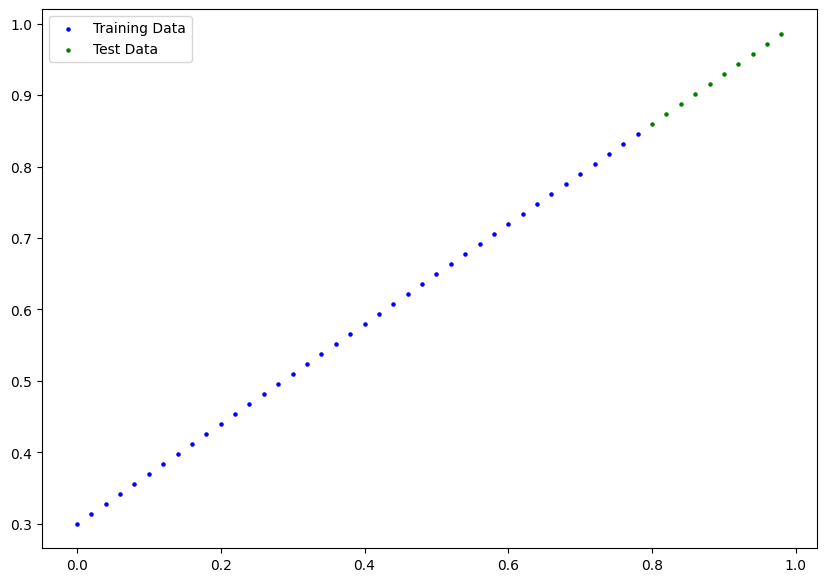

In [9]:
plot_predictions()

In [10]:
# creating a model
class LinearRegressionModel(nn.Module):
    # all models must inherite the nn.Module modul from torch

    # creating the constructor of the class
    def __init__(self):
        # it also must inherit the constructor of the class interited
        super().__init__()

        # creating the parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    # overwriting the forward() method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # all models should overwrite the forward() method
        # this is where we specify what computation need to be made by the model
        return self.weight * x + self.bias

In [11]:
# setting the random seed when creating the model
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [12]:
# checking the model parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
# making predictions without training the model
with torch.inference_mode():
    y_preds = model_0(X_test)


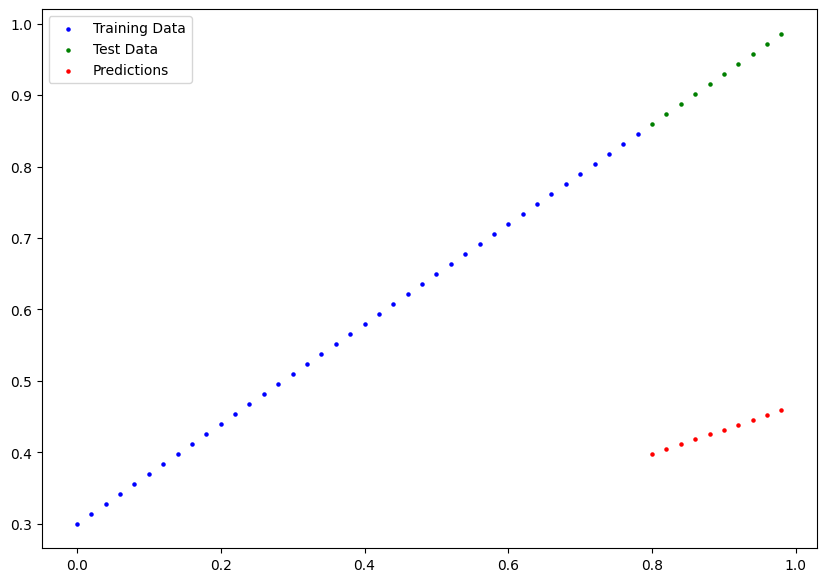

In [15]:
# plotting the predictions
plot_predictions(predictions=y_preds)

In [16]:
# setting up a loss_function and an optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

Începem cu pasul 0, cel prin care trecem prin setul de date. Fiecare trecere prin setul de date o să poarte denumirea de **epocă** (`epochs`). Aceasta o să fie numele variabile pe care trebuie să o definim, iar ca și valoare pentru acestă variabilă o să îi oferim un număr integer ce o să reprezinte cât de multe treceri prin setul de date dorim să avem. După ce stabilim acest număr o să fie nevoie să ne creem o buclă prin care parcurgem acel număr de epoci

In [18]:
# training loop for model training

epochs = 1

for epoch in range(epochs):
    pass

Valoare pe careo să i-o oferim variabilelei *epochs* o să fie 1 pentru început, deși aceasta ar putea fi orice valoare. Din moment ce am setat această valoare la 1 înseamnă că o să treacă o singură dată prin setul de date de antrenare al modelului. Următorul pas pe care trebuie să îl facem este să setăm modelul în modul de 'antrenare' (acest pas nu este trecut în lista de mai sus). Modele din PyTorch au diferite moduri pe care le putem accesa. Atunci când antrenăm un model trebuie să îi trecem în modul de antrenare, iar asta se face prin comanda `model_0.train()`. Se trece numele modelului urmat de metoda **.train()**

In [23]:
# training loop for model training

# an epoch is one loop through the data
epochs = 1

for epoch in range(epochs):

    # set the model in training mode
    model_0.train()


Metoda model_0.train() setează toți parametrii modelului care au fost creați specificând să țină cont de gradient (requires_grad=True) să aibă din nou această valoare. Acest lucru se face deoarece atunci când facem predicții cu un model se dezactivează această funcție, prin urmare trebuie să o reactivăm. Acum putem să revenim la pașii din antrenarea modelului. Urmărul pas este să trecem datele prin metoda forward (*forward pass*). Datele pe care le pasăm în această metodă sunt datele de testare (X_test)

In [24]:
# training loop for model trraining

# an epoch is one loop through the data
epochs = 1

# Step 0. Loop through the data
for epoch in range(epochs):

    # set the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)


Acum după ce am dus datele prin metoda forward() (metodă care defapt face predicții), trebuie să calculăm acel **loss function**, adică să vedem care este performața modelului. Să comparăm predicții cu label-urile de la datele de testare (y_preds comparat cu y_test). Metoda de de loss function pe care am setat-o ia ca și argumente cele două label-uri, label-urile care au fost prezise de către model (y_preds) și label-urile de testare, cele adevărate (y_test) (în ordinea aceasta)

In [ ]:
# training loop for PyTroch model
# an epoch is one loop through the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # set the model in training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

Următorul pas este cel de *optimizer zero grad*. Pasul respectiv nu l-am discutat mai sus. După cum spuneam un model de PyTorch de Deep Learning este îmbunătățit prim modificare parametrilor modelului. Modificarea acestoor parametrii se face cu un optimizator prin acel learning rate pe care îl stabilim. Din moment ce antrenarea se face într-o buclă, de fiecare dată când se trece prin bucla respectivă valoarea cu care se modifică parametrii modelului crește (așa este implementat în PyTorch). De exemplu, dacă specificăm să se modifice valorile parametriilor cu valoare 1, atunci la prima trecere prin buclă o să se modifice cu 1, dar pentru a doua trecere, valoarea aceasta de 1 este reținută de către model și la aceasta se adaugă iar valoare 1 pe care am stabilit-0, prin urmare acuma o să se modifice valoarea parametriilor cu valoarea 2, și acest comportament se repretă tot crescând valoare optimizatorului. Din acest motiv trebuie să setăm valoarea optimizatorului pentru gradient descent la 0 după ce am făcut predicțiile.

Pentru o mai bună înțelegere:

1. Nefolosind zero grad

    ex_model_param1 = 0.5

    learning rate = 1

    - prima buclă (se modifică valoare parametrului cu 1)

        learning rate = 1

        ex_model_param1 = 1.5

    - a doua buclă (la acel learning rate se adaugă din nou valoare 1)

        learning rate = 2

        ex_model_param1 = 3.5 

etc ..

1. Folosind zero grad

    ex_model_param1 = 0.5

    learning rate = 1

    - prima buclă (se modifică valoare parametrului cu 1)

        se aplică optimizer zero grad

        learning rate = 1

        ex_model_param1 = 1.5

    - a doua buclă (la acel learning rate se adaugă din nou valoare 1)

        se aplică optimizer zero grad

        learning rate = 1

        ex_model_param1 = 2.5 

etc ..

In [25]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # set the model to training model
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

Pasul care o să se facă acuma este cel prin care aducem datele din layer-ul de output înapoi în layer-ul de input, procedeu care se realizează prin conceptul de backpropagation. Acest procedeu se aplică pentru acel **loss** care a fost caluclat în Step 2, iar acesta se face prin utilizarea metodei `backward()` pe care o aplicăm loss-ului modelului

In [26]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # setting the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

Ultimul pas este cel prin care o să modificăm parametrii modelului utilizând optimizatorul, iar această modificare se face prin aplicarea valorii ce există în learning rate în optimizator asupra parametrilor modelului. Acest procedeu se realizează cu ajutorul metodei `step()`, metodă care trebuie aplicată asupra optimizatorului. (**optimizer.step()**)

In [27]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 1

# Step 1. Looping through the data
for epoch in range(epochs):

    # setting the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

Acești sunt toți pașii care trebuie urmați pentru a crea o buclă de antrenare a unui model de Deep Learning din PyTorch. Există și o explicare a antrenării unui model pentru fiecare linie în parte și arată cam așa:

<img src='../SS/section_02_image_03.png' width=700>

## Recapitulare

În cadrul secțiunii curente am învățat cum să creem o buclă prin care putem să antrenăm un model de PyTorch

1. Pașii care trebuie urmați pentru a antrena un model de PyTorch sunt următorii:

    - Loop through the data

    - Forward pass

    - Calculate the loss

    - Optimizer zero grad

    - Backpropagation

    - Optimizer step

2. Bucla de a antrena un model de PyTorch arată așa
```python
# asumming that the model is created with optimizer and loss function

# an epoch represents one loop through the data
epochs = 1 

# Step 0. Looping through the data
for epoch in range(epochs):

    # set the model to training mode
    model.train()

    # Step 1. Forward pass
    y_preds = model(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

```